In [1]:
# グラフを移動拡大縮小したい場合
%matplotlib notebook
# グラフをインラインで表示
# %matplotlib inline

#Cell_1.
import gc
import math
import pickle

import warnings
warnings.simplefilter('ignore')

import mylibs.mylib1 as mylib1
import mylibs.mylib2 as mylib2
import mylibs.mylib3 as mylib3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# 表示する行・列の数を設定
pd.options.display.max_rows = 8
pd.options.display.max_columns = 12

# matplotlib のフォントを設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
#Cell_2.
df_bp = pd.read_csv('public_stats/original/nhns_bp.csv', skiprows=6)

df_bp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,総 数,Unnamed: 4,20-29歳,...,Unnamed: 16,（再掲）40-89歳,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,人数,%,人数,...,%,人数,%,NaN,NaN,NaN
1,男性,収縮期（最高）血圧,総数,"1,293",100.0,64,...,100.0,"1,125",100.0,NaN,NaN,NaN
2,NaN,NaN,90mmHg未満,0,0,0,...,0.0,0,0.0,NaN,NaN,NaN
3,NaN,NaN,90- 99,13,1,5,...,0.2,6,0.5,NaN,NaN,NaN
4,NaN,NaN,100-109,64,4.9,15,...,1.8,31,2.8,NaN,NaN,NaN


In [3]:
# Cell_3.
# 割合の情報は削除
# DataFrame 'df_bp' の列の中で、最初の行の値が '%' ではない列のみを抽出する。
# 具体的には、iloc[0] で最初の行のデータを取得し、そのデータが '%' と一致しない列名を df_bp.columns から選び出し、列をフィルタリングする。
df_bp = df_bp.loc[:, df_bp.columns[df_bp.iloc[0] != '%']]

# データの先頭5行を表示して、結果を確認する。
df_bp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,総 数,20-29歳,30-39歳,...,60-69歳,70歳以上,（再掲）40-89歳,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,人数,人数,人数,...,人数,人数,人数,NaN,NaN,NaN
1,男性,収縮期（最高）血圧,総数,"1,293",64,94,...,341,500,"1,125",NaN,NaN,NaN
2,NaN,NaN,90mmHg未満,0,0,0,...,0,0,0,NaN,NaN,NaN
3,NaN,NaN,90- 99,13,5,2,...,1,1,6,NaN,NaN,NaN
4,NaN,NaN,100-109,64,15,18,...,9,9,31,NaN,NaN,NaN


In [4]:
#Cell_4.
#10列目まで取り出す
# 最初の1行目を除いて、最初の10列までを選択した新しい DataFrame 'df_bp' を作成する。
# loc[1:, ...] は行のスライスで、1行目から最終行までを選択する。
# df_bp.columns[:10] は最初の10列を選択する。
df_bp = df_bp.loc[1:, df_bp.columns[:10]]

# 欠損値（NaN）を、直前の値で埋める。
# 'ffill' は「前方フィル」とも呼ばれ、前の行のデータで欠損値を埋める方法。
# これにより、欠損値が前の値で置き換えられる。
df_bp = df_bp.fillna(method='ffill')

# データの先頭5行を表示して、変更が正しく行われたかを確認する。
df_bp.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,総 数,20-29歳,30-39歳,40-49歳,50-59歳,60-69歳,70歳以上
1,男性,収縮期（最高）血圧,総数,"1,293",64,94,128,166,341,500
2,男性,収縮期（最高）血圧,90mmHg未満,0,0,0,0,0,0,0
3,男性,収縮期（最高）血圧,90- 99,13,5,2,3,1,1,1
4,男性,収縮期（最高）血圧,100-109,64,15,18,9,4,9,9
5,男性,収縮期（最高）血圧,110-119,172,18,30,26,31,31,36


In [5]:
#Cell_5.
#列名を変更
df_bp.columns = ['sex', 'bp_type', 'bp_value', 'total',
                 '20s', '30s', '40s', '50s', '60s', '70s']

df_bp.tail()

,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s
48,女性,拡張期（最低）血圧,120-129,1,0,0,0,0,0,1
49,女性,拡張期（最低）血圧,130-139,0,0,0,0,0,0,0
50,女性,拡張期（最低）血圧,140ｍｍHg以上,0,0,0,0,0,0,0
51,注１）血圧の測定を行った20歳以上の者を集計対象とした。,拡張期（最低）血圧,140ｍｍHg以上,0,0,0,0,0,0,0
52,注２）数値は２回の測定値の平均値を用いた。なお、１回しか測定できなかった者については、その値...,拡張期（最低）血圧,140ｍｍHg以上,0,0,0,0,0,0,0


In [6]:
# Cell_6.
# 51行目以下（単なる注釈）を削除する
# DataFrame 'df_bp' の最初の50行を選択し、新しい 'df_bp' として定義する。
# iloc[:50] は、最初の0行目から49行目（合計50行）を取得する。
df_bp = df_bp.iloc[:50]

# 'bp_value' 列の値が '総数' ではない行のみを抽出し、'df_bp' として再定義する。
# loc[df_bp.bp_value != '総数', :] で、条件に一致する行（'総数' を含まない行）を選択する。
df_bp = df_bp.loc[df_bp.bp_value != '総数', :]

# 'df_bp' DataFrame の先頭5行を表示して、処理が意図通りに行われたことを確認する。
display(df_bp.head())


,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s
2,男性,収縮期（最高）血圧,90mmHg未満,0,0,0,0,0,0,0
3,男性,収縮期（最高）血圧,90- 99,13,5,2,3,1,1,1
4,男性,収縮期（最高）血圧,100-109,64,15,18,9,4,9,9
5,男性,収縮期（最高）血圧,110-119,172,18,30,26,31,31,36
6,男性,収縮期（最高）血圧,120-129,251,18,24,35,32,63,79


In [7]:
#Cell_7.
df_bp.sex[df_bp.sex == '男性'] = 'M'
df_bp.sex[df_bp.sex == '女性'] = 'F'
df_bp.bp_type[df_bp.bp_type == '収縮期（最高）血圧'] = 'sbp'
df_bp.bp_type[df_bp.bp_type == '拡張期（最低）血圧'] = 'dbp'
df_bp = df_bp.reset_index()
del df_bp['index']

df_bp

,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s
0,M,sbp,90mmHg未満,0,0,0,0,0,0,0
1,M,sbp,90- 99,13,5,2,3,1,1,1
2,M,sbp,100-109,64,15,18,9,4,9,9
3,M,sbp,110-119,172,18,30,26,31,31,36
...,...,...,...,...,...,...,...,...,...,...
42,F,dbp,110-119,5,0,0,1,2,1,1
43,F,dbp,120-129,1,0,0,0,0,0,1
44,F,dbp,130-139,0,0,0,0,0,0,0
45,F,dbp,140ｍｍHg以上,0,0,0,0,0,0,0


In [8]:
# Cell_8.
# 可視化のための準備を行う。
# seaborn ライブラリをインポートする。これはデータの可視化に使用する。
import seaborn as sns

# 'df_bp' データフレームから、性別が 'M'（男性）で、血圧の種類が 'sbp'（収縮期血圧）のデータのみを抽出し、'df_m_sbp' として定義する。
df_m_sbp = df_bp[(df_bp['sex'] == 'M') & (df_bp['bp_type'] == 'sbp')]

# 'df_bp' データフレームから、性別が 'M'（男性）で、血圧の種類が 'dbp'（拡張期血圧）のデータのみを抽出し、'df_m_dbp' として定義する。
df_m_dbp = df_bp[(df_bp['sex'] == 'M') & (df_bp['bp_type'] == 'dbp')]

# 'df_m_sbp' データフレームに、新しい列 'bp_value_class' を追加する。
# この列には、収縮期血圧の値（85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185）が対応している。
df_m_sbp['bp_value_class'] = [85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185]

# 'df_m_dbp' データフレームに、新しい列 'bp_value_class' を追加する。
# この列には、拡張期血圧の値（35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145）が対応している。
df_m_dbp['bp_value_class'] = [35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145]

# 'df_m_dbp' データフレームの先頭5行を表示して、データを確認する。
display(df_m_dbp.head())

# 'df_m_dbp' データフレームの末尾5行を表示して、データを確認する。
display(df_m_dbp.tail())


,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s,bp_value_class
11,M,dbp,40mmHg未満,0,0,0,0,0,0,0,35
12,M,dbp,40-49,0,0,0,0,0,0,0,45
13,M,dbp,50-59,11,2,1,0,0,1,7,55
14,M,dbp,60-69,144,20,16,10,5,18,75,65
15,M,dbp,70-79,367,20,33,39,44,81,150,75


,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s,bp_value_class
18,M,dbp,100-109,55,0,1,4,15,22,13,105
19,M,dbp,110-119,17,1,0,3,3,5,5,115
20,M,dbp,120-129,0,0,0,0,0,0,0,125
21,M,dbp,130-139,2,0,0,0,1,0,1,135
22,M,dbp,140ｍｍHg以上,1,0,0,1,0,0,0,145


In [9]:
#Cell_9.
print(df_m_sbp.info())
print(df_m_dbp.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             11 non-null     object
 1   bp_type         11 non-null     object
 2   bp_value        11 non-null     object
 3   total           11 non-null     object
 4   20s             11 non-null     object
 5   30s             11 non-null     object
 6   40s             11 non-null     object
 7   50s             11 non-null     object
 8   60s             11 non-null     object
 9   70s             11 non-null     object
 10  bp_value_class  11 non-null     int64 
dtypes: int64(1), object(10)
memory usage: 1.0+ KB
None
(12, 11)


In [10]:
# Cell_10.
# 'df_m_sbp' データフレームの 'total' 列のデータ型を整数型（int）に変換する。
# これにより、'total' 列の値が文字列（str）や浮動小数点（float）であっても、整数として扱われるようになる。
df_m_sbp['total'] = df_m_sbp['total'].astype("int")

# 'df_m_dbp' データフレームの 'total' 列のデータ型を整数型（int）に変換する。
# これにより、'total' 列の値が文字列（str）や浮動小数点（float）であっても、整数として扱われるようになる。
df_m_dbp['total'] = df_m_dbp['total'].astype("int")


<Axes: xlabel='bp_value_class'>

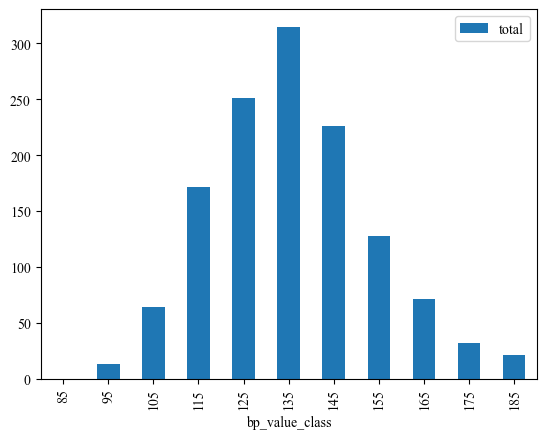

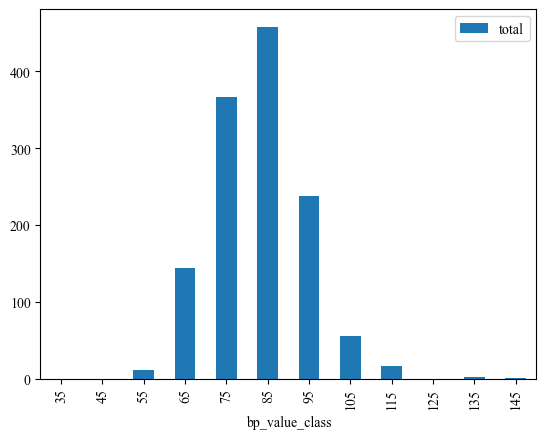

In [11]:
# Cell_11.
# Jupyter Notebook で matplotlib のグラフをインライン表示するためのマジックコマンド。
# このコマンドを使うと、グラフがノートブック内に直接表示されるようになる。
%matplotlib inline

# 'df_m_sbp' データフレームの棒グラフを作成する。
# 'x' 軸には 'bp_value_class' 列（収縮期血圧の値）を、'y' 軸には 'total' 列（各クラスの合計値）を使用する。
# 棒グラフは、収縮期血圧のクラスごとの合計値の分布を視覚的に確認するために使用される。
df_m_sbp.plot.bar(x='bp_value_class', y='total')

# 'df_m_dbp' データフレームの棒グラフを作成する。
# 'x' 軸には 'bp_value_class' 列（拡張期血圧の値）を、'y' 軸には 'total' 列（各クラスの合計値）を使用する。
# 棒グラフは、拡張期血圧のクラスごとの合計値の分布を視覚的に確認するために使用される。
df_m_dbp.plot.bar(x='bp_value_class', y='total')


In [12]:
# Cell_12.
# 'df_bp' データフレームの 'bp_value' 列に含まれるユニークな（重複しない）値の一覧を取得する。
# unique() メソッドを使用して、'bp_value' 列にどのような異なる値が含まれているかを確認できる。
# これは、データの中にどのような種類の血圧値が存在するかを把握するのに役立つ。
df_bp.bp_value.unique()


array(['90mmHg未満', '90- 99', '100-109', '110-119', '120-129', '130-139',
       '140-149', '150-159', '160-169', '170-179', '180mmHg以上',
       '40mmHg未満', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99',
       '140ｍｍHg以上'], dtype=object)

In [13]:
# Cell_13.
# NumPyライブラリを利用するために 'np' としてインポートしていることを前提としています。

# 'sbp_min' という新しい変数を定義し、収縮期血圧（SBP）の最小値を格納する配列を作成する。

# np.concatenate は、複数の配列を連結する関数です。
# ここでは、以下の2つの配列を連結しています：
# 1. [[70]]：これは1つの要素 '70' を含む配列。
# 2. np.arange(9, 19) * 10：これは NumPy の arange 関数を使って、9 から 18 までの整数の配列を生成し、各値に 10 を掛けて [90, 100, ..., 180] という配列を作成している。

# 最終的に、sbp_min は [70, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180] という配列になります。
sbp_min = np.concatenate([[70], np.arange(9, 19) * 10])

# sbp_min 配列を表示して、内容を確認する。
sbp_min


array([ 70,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180])

In [14]:
# Cell_14.
# 'sbp_max' という新しい変数を定義し、収縮期血圧（SBP）の各クラスの最大値を格納する配列を作成する。

# np.concatenate は、複数の配列を連結する関数です。
# ここでは、以下の2つの配列を連結しています：
# 1. sbp_min[1:] - 1：これは 'sbp_min' 配列の最初の要素（70）を除いた残りの値（[90, 100, 110, ..., 180]）に対して、それぞれ1を引いて最大値を設定する。結果として [89, 99, 109, 119, ..., 179] という配列を生成します。
# 2. [199]：これは最大値を 199 として設定する配列。最終的なクラスの上限を設定するために使用される。

# 最終的に、sbp_max は [89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 199] という配列になります。
sbp_max = np.concatenate([sbp_min[1:] - 1, [199]])

# sbp_max 配列を表示して、内容を確認する。
sbp_max


array([ 89,  99, 109, 119, 129, 139, 149, 159, 169, 179, 199])

In [15]:
# Cell_15.
# 'dbp_min' という新しい変数を定義し、拡張期血圧（DBP）の各クラスの最小値を格納する配列を作成する。

# np.arange(4, 15) は、4 から 14 までの整数の配列を生成する（15 は含まれない）。
# その各要素に 10 を掛けることで、[40, 50, 60, ..., 140] という配列を作成する。
dbp_min = np.arange(4, 15) * 10

# 'dbp_min' 配列を表示して、内容を確認する。
dbp_min


array([ 40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140])

In [16]:
# Cell_16.
# 'dbp_max' という新しい変数を定義し、拡張期血圧（DBP）の各クラスの最大値を格納する配列を作成する。

# np.concatenate は、複数の配列を連結する関数です。
# ここでは、以下の2つの配列を連結しています：
# 1. dbp_min[1:] - 1：これは 'dbp_min' 配列の最初の要素（40）を除いた残りの値（[50, 60, 70, ..., 140]）に対して、それぞれ1を引いて最大値を設定する。結果として [49, 59, 69, ..., 139] という配列を生成します。
# 2. [159]：これは最大値を 159 として設定する配列。最終的なクラスの上限を設定するために使用される。

# 最終的に、'dbp_max' は [49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 159] という配列になります。
dbp_max = np.concatenate([dbp_min[1:] - 1, [159]])

# 'dbp_max' 配列を表示して、内容を確認する。
dbp_max


array([ 49,  59,  69,  79,  89,  99, 109, 119, 129, 139, 159])

In [17]:
# Cell_17.
# sbp_min と sbp_max の各要素を対応させた辞書 'dict_sbp_max' を作成する。
# zip(sbp_min, sbp_max) は、sbp_min と sbp_max の対応する要素をペア（タプル）にまとめる。
# {k: v for (k, v) in zip(sbp_min, sbp_max)} は、各ペアを k（キー）, v（バリュー）として辞書形式で定義する。
# 例えば、{70: 89, 90: 99, 100: 109, ...} のような辞書が作成される。
dict_sbp_max = {k: v for (k, v) in zip(sbp_min, sbp_max)}

# dbp_min と dbp_max の各要素を対応させた辞書 'dict_dbp_max' を作成する。
# zip(dbp_min, dbp_max) は、dbp_min と dbp_max の対応する要素をペア（タプル）にまとめる。
# {k: v for (k, v) in zip(dbp_min, dbp_max)} は、各ペアを k（キー）, v（バリュー）として辞書形式で定義する。
# 例えば、{40: 49, 50: 59, 60: 69, ...} のような辞書が作成される。
dict_dbp_max = {k: v for (k, v) in zip(dbp_min, dbp_max)}

# 'dict_sbp_max' 辞書を表示して、内容を確認する。
dict_sbp_max


{70: 89,
 90: 99,
 100: 109,
 110: 119,
 120: 129,
 130: 139,
 140: 149,
 150: 159,
 160: 169,
 170: 179,
 180: 199}

In [18]:
# Cell_18.
# DataFrame 'df_bp' の 'bp_value' 列に '40mmHg未満' という値を持つ行を削除する。
# 'copy()' を使用して、元のデータフレームとは異なる独立したコピーを作成する。
# これにより、元のデータを保持したまま 'df_bp' を操作できる。
df_bp = df_bp[df_bp['bp_value'] != '40mmHg未満'].copy()

# 'np.tile' と 'np.concatenate' を使用して 'bp_min' 列を作成する。
# np.concatenate([sbp_min, dbp_min]) は、収縮期血圧（sbp_min）と拡張期血圧（dbp_min）の配列を連結する。
# np.tile(..., 2) は、連結した配列を2回繰り返すことで、収縮期血圧と拡張期血圧のクラスが繰り返される 'bp_min' 列を生成する。
df_bp['bp_min'] = np.tile(np.concatenate([sbp_min, dbp_min]), 2)

# 'bp_value' 列を削除する。'bp_value' 列は、もう不要であるため削除する。
del df_bp['bp_value']

# 'total' 列を削除する。'total' 列は、もう不要であるため削除する。
del df_bp['total']

# 'df_bp' データフレームを表示して、変更内容を確認する。
df_bp

,sex,bp_type,20s,30s,40s,50s,60s,70s,bp_min
0,M,sbp,0,0,0,0,0,0,70
1,M,sbp,5,2,3,1,1,1,90
2,M,sbp,15,18,9,4,9,9,100
3,M,sbp,18,30,26,31,31,36,110
...,...,...,...,...,...,...,...,...,...
42,F,dbp,0,0,1,2,1,1,110
43,F,dbp,0,0,0,0,0,1,120
44,F,dbp,0,0,0,0,0,0,130
45,F,dbp,0,0,0,0,0,0,140


In [19]:
#Cell_19.
df_bp.dtypes

sex        object
bp_type    object
20s        object
30s        object
            ...  
50s        object
60s        object
70s        object
bp_min      int64
Length: 9, dtype: object

In [20]:
# Cell_20.
# 'df_bp' の2列目以降のすべての列を、int16 型の整数に変換する。

# df_bp.columns[2:] は、データフレームの3列目（0始まりのため）から最後までの列を選択する。
# df_bp[df_bp.columns[2:]] は、その選択された列のデータフレームを表している。
# copy() は、元のデータを変更せずに操作するために独立したコピーを作成する。
# astype('int16') は、選択した列のデータ型を int16（16ビット整数）に変換する。
df_bp[df_bp.columns[2:]] = df_bp[df_bp.columns[2:]].copy().astype('int16')

# df_bp データフレームの各列のデータ型を表示して、変換が正しく行われたかを確認する。
df_bp.dtypes


sex        object
bp_type    object
20s         int16
30s         int16
            ...  
50s         int16
60s         int16
70s         int16
bp_min      int16
Length: 9, dtype: object

In [21]:
# Cell_21.
# 'ages' という変数を定義し、'df_bp' データフレームの3列目から8列目までの列名を格納する。
# 具体的には、['20s', '30s', '40s', '50s', '60s', '70s'] という各年代の列名を指している。
ages = df_bp.columns[2:8]  # ages = ['20s', ... , '70s']

# 'df_bp' から、性別が 'M'（男性）で、血圧の種類が 'sbp'（収縮期血圧）の行を選択する。
# そして、各年代（20代～70代）の回答者数の合計を求める。
# loc[(条件), 列名] を使って、特定の条件に合う行と指定された列を抽出する。
# .sum() を用いることで、選択された各年代の列の値の合計（回答者数の合計）を計算する。
df_bp.loc[(df_bp.sex == 'M') & (df_bp.bp_type == 'sbp'), ages].sum()


20s     64
30s     94
40s    128
50s    166
60s    341
70s    500
dtype: int64

In [22]:
# Cell_22.
# 'df_bp' から、性別が 'M'（男性）で、血圧の種類が 'dbp'（拡張期血圧）の行を選択する。
# そして、各年代（20代～70代）の回答者数の合計を求める。
# loc[(条件), 列名] を使って、特定の条件に合う行と指定された列を抽出する。
# .sum() を用いることで、選択された各年代の列の値の合計（回答者数の合計）を計算する。
df_bp.loc[(df_bp.sex == 'M') & (df_bp.bp_type == 'dbp'), ages].sum()


20s     64
30s     94
40s    128
50s    166
60s    341
70s    500
dtype: int64

In [23]:
#Cell_23.
sex = 'M'
bp_type = 'sbp'
age = '20s'

# 指定する (sex, bp_type, age) における回答者数リスト
ix = (df_bp.sex == sex) & (df_bp.bp_type == bp_type)
n = df_bp.loc[ix, age].values

# リスト n に対応する bp_min リスト
bp_min = df_bp.loc[ix, 'bp_min'].values

print('n =', n)
print('bp_min =', bp_min)

n = [ 0  5 15 18 18  7  0  1  0  0  0]
bp_min = [ 70  90 100 110 120 130 140 150 160 170 180]


In [24]:
# Cell_23.
# sex, bp_type, age という変数を定義し、それぞれ 'M'（男性）、'sbp'（収縮期血圧）、'20s'（20代）を指定する。
sex = 'M'
bp_type = 'sbp'
age = '20s'

# 条件に合致する行を選択するための論理インデックス 'ix' を作成する。
# (df_bp.sex == sex) は性別が 'M'（男性）であることを確認し、(df_bp.bp_type == bp_type) は血圧の種類が 'sbp'（収縮期血圧）であることを確認する。
# & 演算子は、両方の条件を満たす行のみを選択する。
ix = (df_bp.sex == sex) & (df_bp.bp_type == bp_type)

# 条件に合致する行の、指定した年代 'age'（ここでは '20s'）の値を取得し、その値をリスト 'n' に格納する。
# loc[ix, age] は、条件に合致する行の '20s' 列のデータを抽出する。
# .values は、抽出したデータを NumPy 配列として取得する。
n = df_bp.loc[ix, age].values

# 条件に合致する行の 'bp_min' 列の値を取得し、その値をリスト 'bp_min' に格納する。
# loc[ix, 'bp_min'] は、条件に合致する行の 'bp_min' 列のデータを抽出する。
# .values は、抽出したデータを NumPy 配列として取得する。
bp_min = df_bp.loc[ix, 'bp_min'].values

# 回答者数のリスト 'n' を表示する。
print('n =', n)

# 'bp_min' リストを表示する。これは 'n' に対応する収縮期血圧の最小値リストを表す。
print('bp_min =', bp_min)


n = [ 0  5 15 18 18  7  0  1  0  0  0]
bp_min = [ 70  90 100 110 120 130 140 150 160 170 180]


In [25]:
#Cell_24.
bp_min.repeat(n)

array([ 90,  90,  90,  90,  90, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 130, 130, 130, 130, 130, 130, 130, 150],
      dtype=int16)

In [26]:
# Cell_25.

# まず、'bp_min.repeat(n)' を実行して、繰り返しデータの動作を確認。
bp_min.repeat(n)

# 'dict_bp_min_dist' という空の辞書を作成し、各性別（'M', 'F'）と血圧の種類（'dbp', 'sbp'）をネストした辞書構造で初期化する。
# 'M'（男性）と 'F'（女性）それぞれに対して、'dbp'（拡張期血圧）と 'sbp'（収縮期血圧）のキーを持つネストした辞書を作成する。
dict_bp_min_dist = {}
dict_bp_min_dist['M'] = {}
dict_bp_min_dist['M']['dbp'] = {}
dict_bp_min_dist['M']['sbp'] = {}
dict_bp_min_dist['F'] = {}
dict_bp_min_dist['F']['dbp'] = {}
dict_bp_min_dist['F']['sbp'] = {}

# 'M'（男性）と 'F'（女性）の性別ごとにループを開始する。
for sex in ['M', 'F']:
    # 'sbp'（収縮期血圧）と 'dbp'（拡張期血圧）の血圧の種類ごとにループを実行する。
    for bp_type in ['sbp', 'dbp']:
        # 'ages' リスト内の各年代（'20s' から '70s'）ごとにループを実行する。
        for age in ages:
            # 現在の性別、血圧の種類、年代に対応する辞書を作成する。
            dict_bp_min_dist[sex][bp_type][age] = {}
            
            # 現在の性別と血圧の種類に一致する行を選択するための論理インデックス 'ix' を作成する。
            ix = (df_bp.sex == sex) & (df_bp.bp_type == bp_type)
            
            # 選択された行の、指定した年代 'age' の値をリスト 'n' に格納する（回答者数を表す）。
            n = df_bp.loc[ix, age].values
            
            # 選択された行の 'bp_min' 列の値をリスト 'bp_min' に格納する（血圧の最小値を表す）。
            bp_min = df_bp.loc[ix, 'bp_min'].values
            
            # 'bp_min' の各値を、'n' の対応する要素数だけ繰り返して配列を作成し、辞書 'dict_bp_min_dist' に格納する。
            dict_bp_min_dist[sex][bp_type][age] = bp_min.repeat(n)


In [27]:
# Cell_26.
# 'dict_bp_min_dist' 辞書から、男性（'M'）の収縮期血圧（'sbp'）の20代（'20s'）の血圧データを取得する。

# 'dict_bp_min_dist' は、性別（'M', 'F'）、血圧の種類（'sbp', 'dbp'）、年代（'20s' から '70s'）のネストされた辞書構造を持つ。
# 'M'（男性）、'sbp'（収縮期血圧）、'20s'（20代）に対応する辞書の値を取得することで、
# 男性の20代の収縮期血圧クラスに属する回答者数分の 'bp_min' 配列が得られる。
dict_bp_min_dist['M']['sbp']['20s']


array([ 90,  90,  90,  90,  90, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 130, 130, 130, 130, 130, 130, 130, 150],
      dtype=int16)

In [28]:
# Cell_27.
# pickle ライブラリをインポートする。
# pickle は、Python オブジェクトをバイナリファイルとして保存したり、逆にバイナリファイルからオブジェクトを復元するのに使用される。

import pickle

# './public_stats/processed/dict_bp_min_dist.binaryfile' というパスでファイルを開く。
# 'wb' は「書き込み用バイナリモード」を意味し、新しいバイナリファイルを作成する。
# ファイルオブジェクト 'f' に対して書き込み操作を行うことができる。
f = open('./public_stats/processed/dict_bp_min_dist.binaryfile', 'wb')  # wb: Write Binary

# 'dict_bp_min_dist' オブジェクトをバイナリファイルに保存する。
# pickle.dump() 関数は、指定されたオブジェクト（ここでは 'dict_bp_min_dist'）を指定されたファイルオブジェクト（'f'）に書き込む。
pickle.dump(dict_bp_min_dist, f)

# ファイルを閉じて、書き込み操作を終了する。
# これを行わないと、ファイルが正しく保存されなかったり、データの破損が発生することがある。
f.close()


In [29]:
# Cell_28.
# './public_stats/processed/dict_bp_min_dist.binaryfile' というパスでバイナリファイルを読み込みモードで開く。
# 'rb' は「読み込み用バイナリモード」を意味し、ファイルからデータを読み取ることができる。
# ファイルオブジェクト 'f' に対して読み取り操作を行う準備をする。
f = open('./public_stats/processed/dict_bp_min_dist.binaryfile', 'rb')  # rb: Read Binary

# pickle.load() 関数を使って、バイナリファイル 'f' からオブジェクトを読み込み、'dict_bp_min_dist' として復元する。
# これにより、前に保存した 'dict_bp_min_dist' の辞書データが復元される。
dict_bp_min_dist = pickle.load(f)

# ファイルを閉じて、読み込み操作を終了する。
# これを行わないと、ファイルリソースの無駄遣いや、他の操作に支障をきたすことがある。
f.close()

# 復元した 'dict_bp_min_dist' 辞書から、男性（'M'）の収縮期血圧（'sbp'）、20代（'20s'）のデータを表示する。
# これは、男性の20代の収縮期血圧クラスに属する回答者数分の 'bp_min' 配列を表示する。
dict_bp_min_dist['M']['sbp']['20s']


array([ 90,  90,  90,  90,  90, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 130, 130, 130, 130, 130, 130, 130, 150],
      dtype=int16)

In [30]:
# Cell_29.

# 'dict_dbp_max' 辞書を './public_stats/processed/dict_dbp_max.binaryfile' というパスにバイナリ形式で保存する。

# バイナリファイル './public_stats/processed/dict_dbp_max.binaryfile' を「書き込み用バイナリモード（'wb'）」で開く。
# 'wb' は「書き込み用バイナリモード」を意味し、新しいバイナリファイルを作成する準備を行う。
f = open('./public_stats/processed/dict_dbp_max.binaryfile', 'wb')  # wb: Write Binary

# 'dict_dbp_max' オブジェクトをバイナリファイルに保存する。
# pickle.dump() 関数を使用して、指定されたオブジェクト（ここでは 'dict_dbp_max'）を指定されたファイルオブジェクト（'f'）に書き込む。
pickle.dump(dict_dbp_max, f)

# ファイルを閉じて、書き込み操作を終了する。
# これを行わないと、データが正しく保存されない場合があるため、必ずファイルを閉じる必要がある。
f.close()

# 'dict_sbp_max' 辞書を './public_stats/processed/dict_sbp_max.binaryfile' というパスにバイナリ形式で保存する。

# バイナリファイル './public_stats/processed/dict_sbp_max.binaryfile' を「書き込み用バイナリモード（'wb'）」で開く。
f = open('./public_stats/processed/dict_sbp_max.binaryfile', 'wb')  # wb: Write Binary

# 'dict_sbp_max' オブジェクトをバイナリファイルに保存する。
# pickle.dump() 関数を使用して、指定されたオブジェクト（ここでは 'dict_sbp_max'）を指定されたファイルオブジェクト（'f'）に書き込む。
pickle.dump(dict_sbp_max, f)

# ファイルを閉じて、書き込み操作を終了する。
f.close()


In [31]:
# Cell_30.
# './public_stats/processed/dict_dbp_max.binaryfile' というパスでバイナリファイルを読み込みモードで開く。
# 'rb' は「読み込み用バイナリモード」を意味し、ファイルからデータを読み取ることができる。
# ファイルオブジェクト 'f' に対して読み取り操作を行う準備をする。
f = open('./public_stats/processed/dict_dbp_max.binaryfile', 'rb')  # rb: Read Binary

# pickle.load() 関数を使って、バイナリファイル 'f' からオブジェクトを読み込み、'dict_dbp_min' として復元する。
# しかし、ファイルには 'dict_dbp_max' が保存されているので、'dict_dbp_min' ではなく 'dict_dbp_max' を変数名として使うべきです。
dict_dbp_min = pickle.load(f)

# ファイルを閉じて、読み込み操作を終了する。
# これを行わないと、ファイルリソースの無駄遣いや、他の操作に支障をきたすことがある。
f.close()

# 読み込んだ 'dict_dbp_min'（実際は 'dict_dbp_max'）の内容を表示する。
dict_dbp_min


{40: 49,
 50: 59,
 60: 69,
 70: 79,
 80: 89,
 90: 99,
 100: 109,
 110: 119,
 120: 129,
 130: 139,
 140: 159}

In [32]:
# Cell_31.
# './public_stats/processed/dict_sbp_max.binaryfile' というパスでバイナリファイルを読み込みモードで開く。
# 'rb' は「読み込み用バイナリモード」を意味し、ファイルからデータを読み取ることができる。
# ファイルオブジェクト 'f' に対して読み取り操作を行う準備をする。
f = open('./public_stats/processed/dict_sbp_max.binaryfile', 'rb')  # rb: Read Binary

# pickle.load() 関数を使って、バイナリファイル 'f' からオブジェクトを読み込み、'dict_sbp_min' として復元する。
# しかし、ファイルには 'dict_sbp_max' が保存されているので、'dict_sbp_min' ではなく 'dict_sbp_max' を変数名として使うべきです。
dict_sbp_min = pickle.load(f)

# ファイルを閉じて、読み込み操作を終了する。
# これを行わないと、ファイルリソースの無駄遣いや、他の操作に支障をきたすことがある。
f.close()

# 読み込んだ 'dict_sbp_min'（実際は 'dict_sbp_max'）の内容を表示する。
dict_sbp_min


{70: 89,
 90: 99,
 100: 109,
 110: 119,
 120: 129,
 130: 139,
 140: 149,
 150: 159,
 160: 169,
 170: 179,
 180: 199}

In [33]:
# Cell_32.
# 'df_bp' データフレームを CSV ファイルとして保存する。
# ファイルパスは './public_stats/processed/df_bp.csv' で、インデックスは保存しない（index=False）。
df_bp.to_csv('./public_stats/processed/df_bp.csv', index=False)

# 保存した CSV ファイルからデータを読み込み、新しい 'df_bp' データフレームを作成する。
# pd.read_csv() 関数を使用して、指定されたパスの CSV ファイルを読み込む。
df_bp = pd.read_csv('./public_stats/processed/df_bp.csv')

# 読み込んだ 'df_bp' データフレームを表示して、内容を確認する。
df_bp


,sex,bp_type,20s,30s,40s,50s,60s,70s,bp_min
0,M,sbp,0,0,0,0,0,0,70
1,M,sbp,5,2,3,1,1,1,90
2,M,sbp,15,18,9,4,9,9,100
3,M,sbp,18,30,26,31,31,36,110
...,...,...,...,...,...,...,...,...,...
40,F,dbp,0,0,1,2,1,1,110
41,F,dbp,0,0,0,0,0,1,120
42,F,dbp,0,0,0,0,0,0,130
43,F,dbp,0,0,0,0,0,0,140


In [34]:
# Cell_33.

# 拡張期血圧（dbp）と収縮期血圧（sbp）を入力として、血圧の分類を計算する関数 'calc_bp_class' を定義する。
# この関数は、5段階の血圧クラスを計算して、クラス番号を返す。

def calc_bp_class(dbp, sbp):
    # 以下の条件に基づいて、血圧クラスを計算する:
    # - 拡張期血圧（dbp）が 80 以上 または 収縮期血圧（sbp）が 120 以上なら 1 を足す。
    # - 拡張期血圧（dbp）が 85 以上 または 収縮期血圧（sbp）が 130 以上ならさらに 1 を足す。
    # - 拡張期血圧（dbp）が 90 以上 または 収縮期血圧（sbp）が 140 以上ならさらに 1 を足す。
    # - 拡張期血圧（dbp）が 100 以上 または 収縮期血圧（sbp）が 160 以上ならさらに 1 を足す。
    # - 拡張期血圧（dbp）が 110 以上 または 収縮期血圧（sbp）が 180 以上ならさらに 1 を足す。
    # それぞれの条件を満たす場合に 1 を足し、その合計が血圧クラスとなる。
    return ((dbp >= 80) | (sbp >= 120)) * 1 \
         + ((dbp >= 90) | (sbp >= 140)) * 1 \
         + ((dbp >= 100) | (sbp >= 160)) * 1 \
         + ((dbp >= 110) | (sbp >= 180)) * 1

# 年齢ごとにマーカーの色を変える辞書 'dict_color' を定義する。
# 各年代（20s から 70s）に対して、対応する色を設定する。
# 例えば、20代は赤（'r'）、30代はオレンジ（'orange'）など、各年代ごとに異なる色を割り当てる。
dict_color = {'20s': 'r', '30s': 'orange', '40s': 'y',
              '50s': 'g', '60s': 'b', '70s': 'purple'}

# マーカーを血圧分類値（0 から 5）に対応させる辞書 'dict_marker' を定義する。
# 各クラス番号（0 から 5）に対して、対応するマーカーを設定する。
# マーカーは $0$, $1$, ... $5$ のように、分類値を直接表示する記号として使用する。
# これにより、プロット上で血圧クラスが視覚的に分かるようになる。
dict_marker = {0: '$0$', 1: '$1$', 2: '$2$', 3: '$3$', 4: '$4$', 5: '$5$'}


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 4 4 4 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

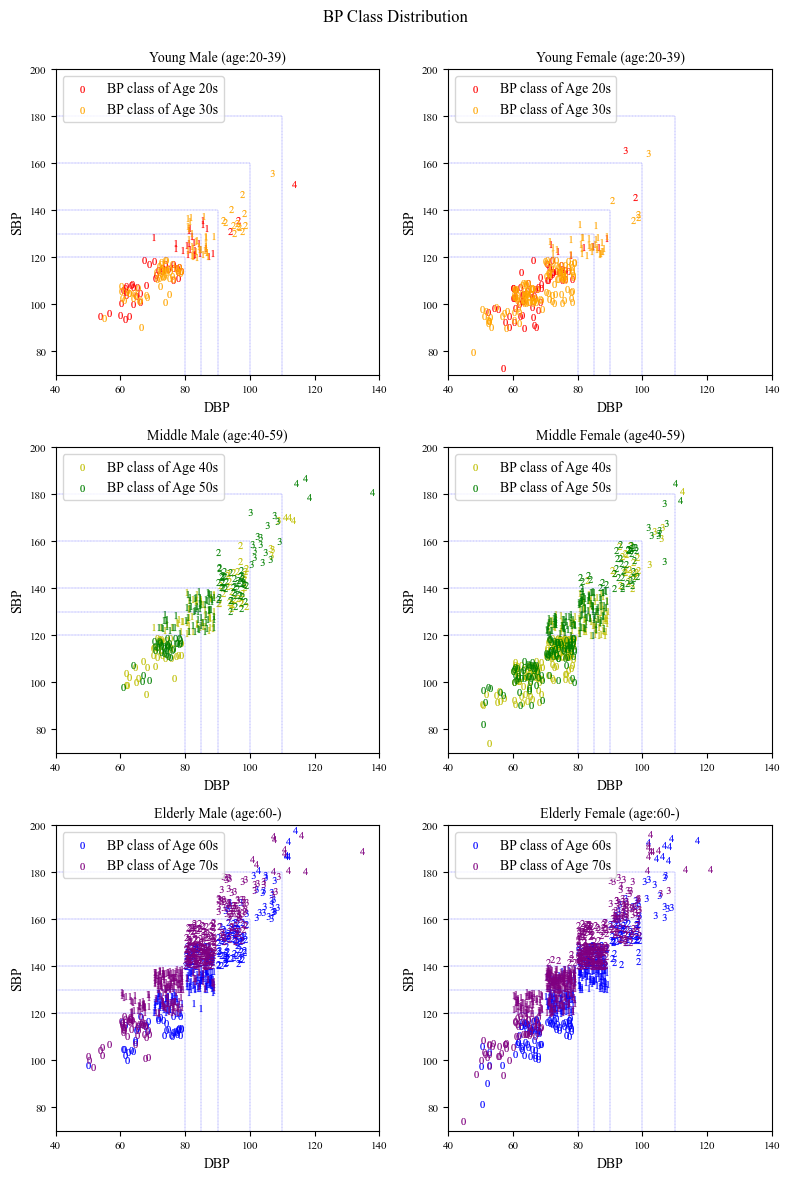

In [35]:
# Cell_34.

# 表示するグラフの全体のサイズ（幅8インチ、高さ12インチ）を設定し、図全体のタイトルを設定する。
fig = plt.figure(figsize=(8, 12))
fig.suptitle('BP Class Distribution')

# 6つの散布図を配置するためのサブプロットを定義する。
# 3行2列のグリッドにそれぞれのプロットを配置する。
ax_My = fig.add_subplot(321)  # Male   Young
ax_Fy = fig.add_subplot(322)  # Female Young
ax_Mm = fig.add_subplot(323)  # Male   Middle
ax_Fm = fig.add_subplot(324)  # Female Middle
ax_Me = fig.add_subplot(325)  # Male   Elderly
ax_Fe = fig.add_subplot(326)  # Female Elderly

# 乱数シードを初期化
rs = 0
np.random.seed(rs)

# 性別のリスト
sexes = ['M', 'F']

# 年代（20代から70代）の列名
ages = df_bp.columns[2:8]

# 性別と年代ごとにデータをプロットするためのループ
for sex in sexes:
    for age in ages:
        # 収縮期血圧（SBP）と拡張期血圧（DBP）の最小値と最大値を取得する
        sbp_min = dict_bp_min_dist[sex]['sbp'][age]
        sbp_max = [dict_sbp_max[sbpm] for sbpm in sbp_min]
        dbp_min = dict_bp_min_dist[sex]['dbp'][age]
        dbp_max = [dict_dbp_max[dbpm] for dbpm in dbp_min]
        n = len(sbp_min)

        # 収縮期血圧（SBP）の乱数を生成
        sbp = np.random.rand(n) * (sbp_max - sbp_min) + sbp_min
        rs = rs + 1
        np.random.seed(rs)

        # 拡張期血圧（DBP）の乱数を生成
        dbp = np.random.rand(n) * (dbp_max - dbp_min) + dbp_min
        rs = rs + 1
        np.random.seed(rs)

        # 対応するサブプロットを選択
        if sex == 'M' and (age == '20s' or age == '30s'):
            ax = ax_My
        elif sex == 'M' and (age == '40s' or age == '50s'):
            ax = ax_Mm
        elif sex == 'M' and (age == '60s' or age == '70s'):
            ax = ax_Me
        elif sex == 'F' and (age == '20s' or age == '30s'):
            ax = ax_Fy
        elif sex == 'F' and (age == '40s' or age == '50s'):
            ax = ax_Fm
        else:
            ax = ax_Fe

        # 血圧クラスを計算し、マーカーを設定する
        marker = calc_bp_class(dbp, sbp)
        print(marker)
        for m in np.arange(6):
            x = dbp[marker == m]
            y = sbp[marker == m]
            if m == 0:
                # 最初のデータに対して凡例を表示
                ax.scatter(x, y, c=dict_color[age], marker=dict_marker[m],
                           s=25, linewidth=0.1, label='BP class of Age ' + age)
            else:
                # 残りのデータは凡例なしでプロット
                ax.scatter(x, y, c=dict_color[age], marker=dict_marker[m],
                           s=25, linewidth=0.1)

# すべてのサブプロットをリストに格納
axes = [ax_My, ax_Mm, ax_Me, ax_Fy, ax_Fm, ax_Fe]

# 血圧分類の境界線を追加
for ax in axes:
    # 縦の境界線を追加
    ax.plot([80, 80], [70, 120], linestyle='--', c='blue', linewidth=0.2)
    ax.plot([85, 85], [70, 130], linestyle='--', c='blue', linewidth=0.2)
    ax.plot([90, 90], [70, 140], linestyle='--', c='blue', linewidth=0.2)
    ax.plot([100, 100], [70, 160], linestyle='--', c='blue', linewidth=0.2)
    ax.plot([110, 110], [70, 180], linestyle='--', c='blue', linewidth=0.2)
    # 横の境界線を追加
    ax.plot([40, 80], [120, 120], linestyle='--', c='blue', linewidth=0.2)
    ax.plot([40, 85], [130, 130], linestyle='--', c='blue', linewidth=0.2)
    ax.plot([40, 90], [140, 140], linestyle='--', c='blue', linewidth=0.2)
    ax.plot([40, 100], [160, 160], linestyle='--', c='blue', linewidth=0.2)
    ax.plot([40, 110], [180, 180], linestyle='--', c='blue', linewidth=0.2)

# 各サブプロットにタイトルと軸ラベルを追加
titles = ['Young Male (age:20-39)', 'Middle Male (age:40-59)',
          'Elderly Male (age:60-)', 'Young Female (age:20-39)',
          'Middle Female (age40-59)', 'Elderly Female (age:60-)']
for ax, title in zip(axes, titles):
    ax.set_xlabel('DBP', fontsize=10)
    ax.set_ylabel('SBP', fontsize=10)
    ax.set_xlim(40, 140)
    ax.set_ylim(70, 200)
    ax.set_title(title, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.legend(fontsize=10)

# サブプロット同士の間隔を調整
plt.tight_layout()

# 全体の図の上部の余白を調整
plt.subplots_adjust(top=0.93)
